In [ ]:
import pandas as pd
listings = pd.read_csv('listings-masters-modeling.csv', error_bad_lines=False, engine="python")
listings

,id,listing_url,name,description,picture_url,hostid,host_since,host_response_time,host_response_rate,host_acceptance_rate,superhost,host_listings_count,host_identity_verified,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms_text,bathrooms,bedrooms,beds,amenities,amenities_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",https://a0.muscache.com/pictures/f0813a11-40b2...,2845,9/9/2008,within a few hours,0.92,0.25,0.0,6.0,True,115,3,40.75362,-73.98377,1,2,1 bath,1.0,NaN,1.0,"[""Hot water"", ""Extra pillows and blankets"", ""O...",31,175,30,1125,30,60,90,365,48,94.0,9.0,9.0,10.0,10.0,9.0,0
1,3831,https://www.airbnb.com/rooms/3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,12/7/2008,within an hour,0.95,0.93,0.0,1.0,True,63,2,40.68514,-73.95976,1,3,1 bath,1.0,1.0,3.0,"[""Hot water"", ""Shampoo"", ""Baby safety gates"", ...",35,74,1,730,12,31,61,307,375,89.0,9.0,9.0,9.0,10.0,10.0,0
2,5121,https://www.airbnb.com/rooms/5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,https://a0.muscache.com/pictures/2090980c-b68e...,7356,2/3/2009,,0.00,0.00,0.0,1.0,True,52,2,40.68688,-73.95596,2,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Kitchen"", ""Heating"", ""Air conditioni...",4,60,30,730,30,60,90,365,50,90.0,8.0,8.0,10.0,9.0,9.0,0
3,5178,https://www.airbnb.com/rooms/5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,https://a0.muscache.com/pictures/12065/f070997...,8967,3/3/2009,within a day,1.00,1.00,0.0,1.0,False,115,3,40.76468,-73.98315,2,2,1 bath,1.0,1.0,1.0,"[""Wifi"", ""Heating"", ""Refrigerator"", ""Shampoo"",...",18,65,2,14,0,0,0,0,474,84.0,9.0,8.0,9.0,10.0,9.0,0
4,279857,https://www.airbnb.com/rooms/279857,Entire Home w 8 BR /5 Bath No share Yellow Block,As seen on The Net Flix Show Stay Here Show 4 ...,https://a0.muscache.com/pictures/4b888435-e2ea...,1420300,11/18/2011,within an hour,1.00,0.96,1.0,1.0,True,52,2,40.68492,-73.95489,2,16,5 baths,5.0,8.0,18.0,"[""Hot water"", ""Crib"", ""Shampoo"", ""Oven"", ""Extr...",45,650,1,29,25,55,85,347,140,97.0,10.0,10.0,10.0,10.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,46937371,https://www.airbnb.com/rooms/46937371,Gramercy Loft-Studio/Prime Location ~W&D in unit~,This AMAZING ALL Brand NEW **5 Star quality** ...,https://a0.muscache.com/pictures/a70776a5-f510...,27181542,2/3/2015,within an hour,1.00,1.00,0.0,10.0,True,111,3,40.73961,-73.97971,1,2,1 bath,1.0,NaN,1.0,"[""Hot water"", ""Oven"", ""Iron"", ""Washer"", ""Long ...",30,199,30,365,30,60,90,180,0,NaN,NaN,NaN,NaN,NaN,NaN,0
36919,46937954,https://www.airbnb.com/rooms/46937954,Upper West Side Penthouse- Terrace & Hidden Ga...,"Bright, sunny and well-maintained Penthouse wi...",https://a0.muscache.com/pictures/5962e4a1-a1a9...,287807769,8/21/2019,,0.00,0.00,0.0,0.0,True,127,3,40.78061,-73.98514,1,3,1 bath,1.0,1.0,1.0,"[""First aid kit"", ""Wifi"", ""Heating"", ""Shampoo""...",16,205,30,1125,23,53,83,83,0,NaN,NaN,NaN,NaN,NaN,NaN,0
36920,46938514,https://www.airbnb.com/rooms/46938514,Cozy shared room in East Harlem,"""Common area with twin day bed in the ""El Ba...",https://a0.muscache.com/pictures/94c199b0-5262...,303319010,10/19/2019,,0.00,1.00,1.0,0.0,True,102,3,40.80054,-73.93340,4,1,1 shared bath,1.0,1.0,0.0,"[""Wifi"", ""First aid kit"", ""Heating"", ""Essentia...",10,35,1,28,26,56,86,176,0,NaN,NaN,NaN,NaN,NaN,NaN,0
36921,46938537,https://www.airbnb.com/rooms/46938537,Boho

In [ ]:
listings.columns

Index(['id', 'listing_url', 'name', 'description', 'picture_url', 'hostid',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhoodid', 'borough_id', 'latitude',
       'longitude', 'room_typeid', 'accommodates', 'bathrooms_text',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'amenities_count',
       'price', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [ ]:
useless = ['id', 'listing_url', 'name', 'description', 'picture_url', 'hostid', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_identity_verified', 'bathrooms_text', 'amenities']
listings.drop(useless, axis=1, inplace=True)

In [ ]:
reviews_scores = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value']
listings.drop(reviews_scores, axis=1, inplace=True)


In [ ]:
listings.head()

,superhost,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,amenities_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,0.0,6.0,115,3,40.75362,-73.98377,1,2,1.0,NaN,1.0,31,175,30,1125,30,60,90,365,48,94.0,0
1,0.0,1.0,63,2,40.68514,-73.95976,1,3,1.0,1.0,3.0,35,74,1,730,12,31,61,307,375,89.0,0
2,0.0,1.0,52,2,40.68688,-73.95596,2,2,NaN,1.0,1.0,4,60,30,730,30,60,90,365,50,90.0,0
3,0.0,1.0,115,3,40.76468,-73.98315,2,2,1.0,1.0,1.0,18,65,2,14,0,0,0,0,474,84.0,0
4,1.0,1.0,52,2,40.68492,-73.95489,2,16,5.0,8.0,18.0,45,650,1,29,25,55,85,347,140,97.0,1


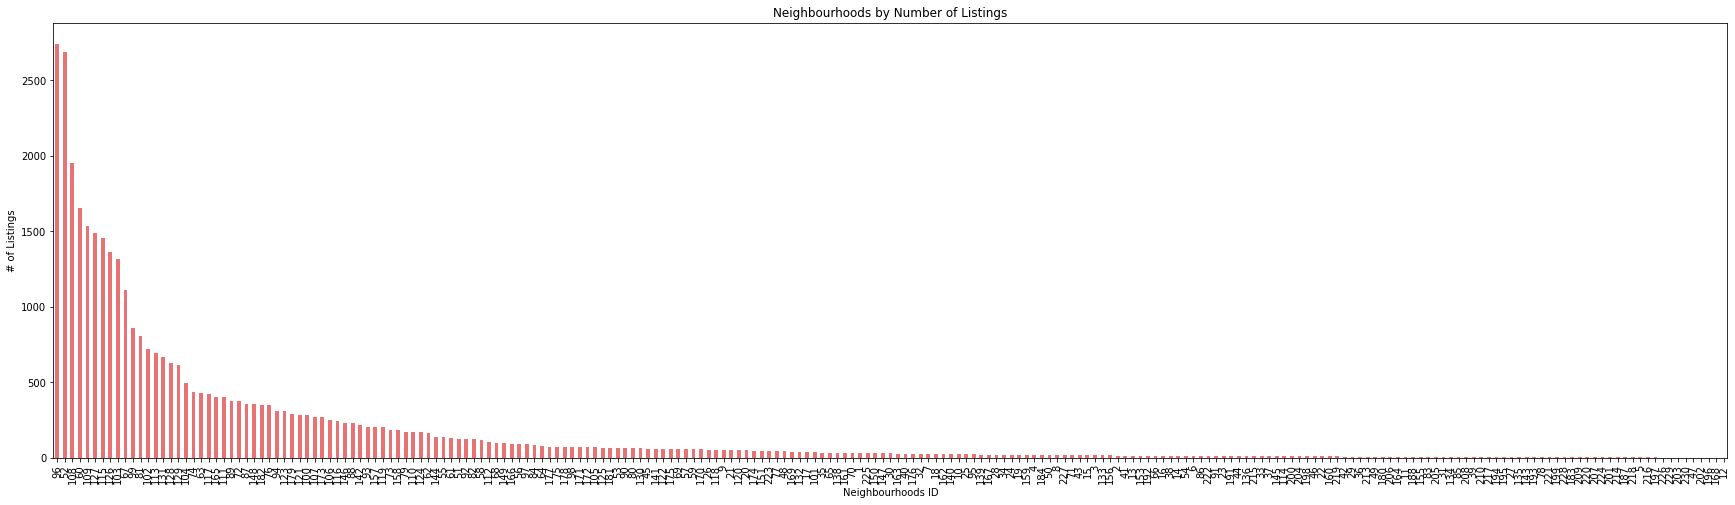

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

count_per_neighbourhood = listings['neighbourhoodid'].value_counts()
ax = count_per_neighbourhood.plot(kind='bar', figsize = (30,8), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighbourhoods by Number of Listings")
ax.set_xlabel("Neighbourhoods ID")
ax.set_ylabel("# of Listings")
plt.show()

In [ ]:
relevant_neighbourhoods = count_per_neighbourhood[count_per_neighbourhood > 100].index
listings_cleaned = listings[listings['neighbourhoodid'].isin(relevant_neighbourhoods)]

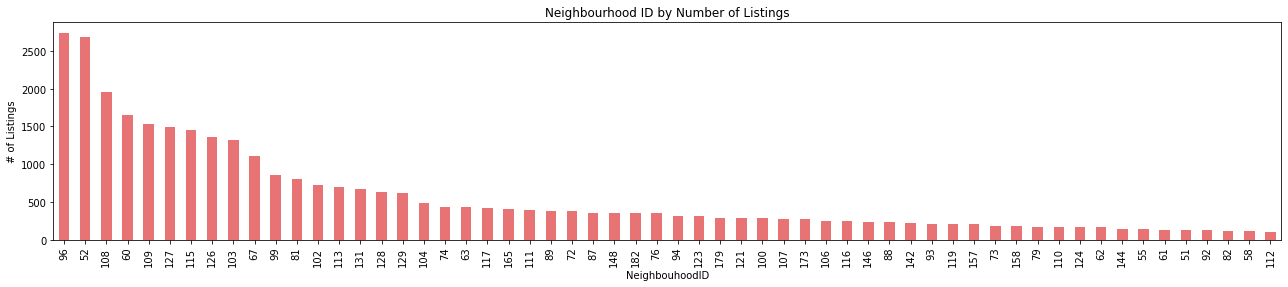

Number of entries removed:  4042


In [ ]:
# Plot new zipcodes distribution
count_per_neighbourhood = listings_cleaned ['neighbourhoodid'].value_counts()
ax = count_per_neighbourhood.plot(kind='bar', figsize = (22,4), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighbourhood ID by Number of Listings")
ax.set_xlabel("NeighbouhoodID")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', listings.shape[0] - listings_cleaned.shape[0])

In [ ]:
import numpy as np
from sklearn import preprocessing

# Function to label encode categorical variables.
# Input: array (array of values)
# Output: array (array of encoded values)
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Temporary dataframe
temp_data = listings_cleaned.copy()

# Delete additional entries with NaN values
temp_data = temp_data.dropna(axis=0)

# Encode categorical data
temp_data = temp_data.apply(encode_categorical)
# Compute matrix of correlation coefficients
corr_matrix = temp_data.corr()

corr_matrix

,superhost,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,amenities_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable
superhost,1.000000,-0.041037,-0.042067,-0.024732,-0.034081,0.077373,-0.025132,0.065505,0.005250,0.051192,0.075581,0.344862,0.028639,-0.209745,-0.123123,0.099941,0.125921,0.138703,0.146881,0.312693,0.188876,-0.006761
host_listings_count,-0.041037,1.000000,0.059490,0.059113,0.033981,-0.039926,-0.035912,-0.015402,-0.008744,-0.019462,-0.017964,0.046788,0.046124,0.033491,0.051368,-0.010974,0.002899,0.011553,0.050736,-0.046453,-0.039478,0.079025
neighbourhoodid,-0.042067,0.059490,1.000000,0.886871,0.644264,0.087072,0.032110,-0.036783,-0.066243,-0.062318,-0.027800,-0.048921,0.086615,0.039417,0.063941,0.060110,0.060821,0.060270,0.046145,-0.030775,-0.036789,0.011316
borough_id,-0.024732,0.059113,0.886871,1.000000,0.627349,0.200638,0.068289,-0.037382,-0.056710,-0.067128,-0.021545,-0.027882,0.032927,0.013523,0.048263,0.096204,0.097521,0.096877,0.076734,-0.002614,-0.056197,0.034037
latitude,-0.034081,0.033981,0.644264,0.627349,1.000000,0.017036,0.042926,-0.050896,-0.053762,-0.079850,-0.047552,-0.034556,0.045936,0.059836,0.058177,0.036617,0.028355,0.023719,0.013959,-0.030912,-0.033203,0.019410
longitude,0.077373,-0.039926,0.087072,0.200638,0.017036,1.000000,0.141403,-0.023609,0.006463,-0.017200,0.007400,0.054569,-0.281090,-0.085971,-0.071510,0.064846,0.083571,0.093255,0.062627,0.067172,-0.014480,-0.000547
room_typeid,-0.025132,-0.035912,0.032110,0.068289,0.042926,0.141403,1.000000,-0.451925,-0.022315,-0.329727,-0.283982,-0.137445,-0.416699,-0.065126,-0.021782,0.075169,0.065184,0.058058,0.035509,0.009964,-0.089593,0.120844
accommodates,0.065505,-0.015402,-0.036783,-0.037382,-0.050896,-0.023609,-0.451925,1.000000,0.353352,0.735408,0.755331,0.250740,0.570895,-0.094287,0.021774,0.072136,0.076994,0.081131,0.118322,0.067152,0.000554,0.000880
bathrooms,0.005250,-0.008744,-0.066243,-0.056710,-0.053762,0.006463,-0.022315,0.353352,1.000000,0.439068,0.354867,0.129887,0.307448,-0.031600,0.002857,0.053797,0.055429,0.056478,0.074337,-0.038504,-0.029869,0.022433
bedrooms,0.051192,-0.019462,-0.062318,-0.067128,-0.079850,-0.017200,-0.329727,0.735408,0.439068,1.000000,0.709192,0.187642,0.514000,-0.057169,-0.003119,0.058727,0.061012,0.064429,0.088430,0.008742,0.011510,-0.037085


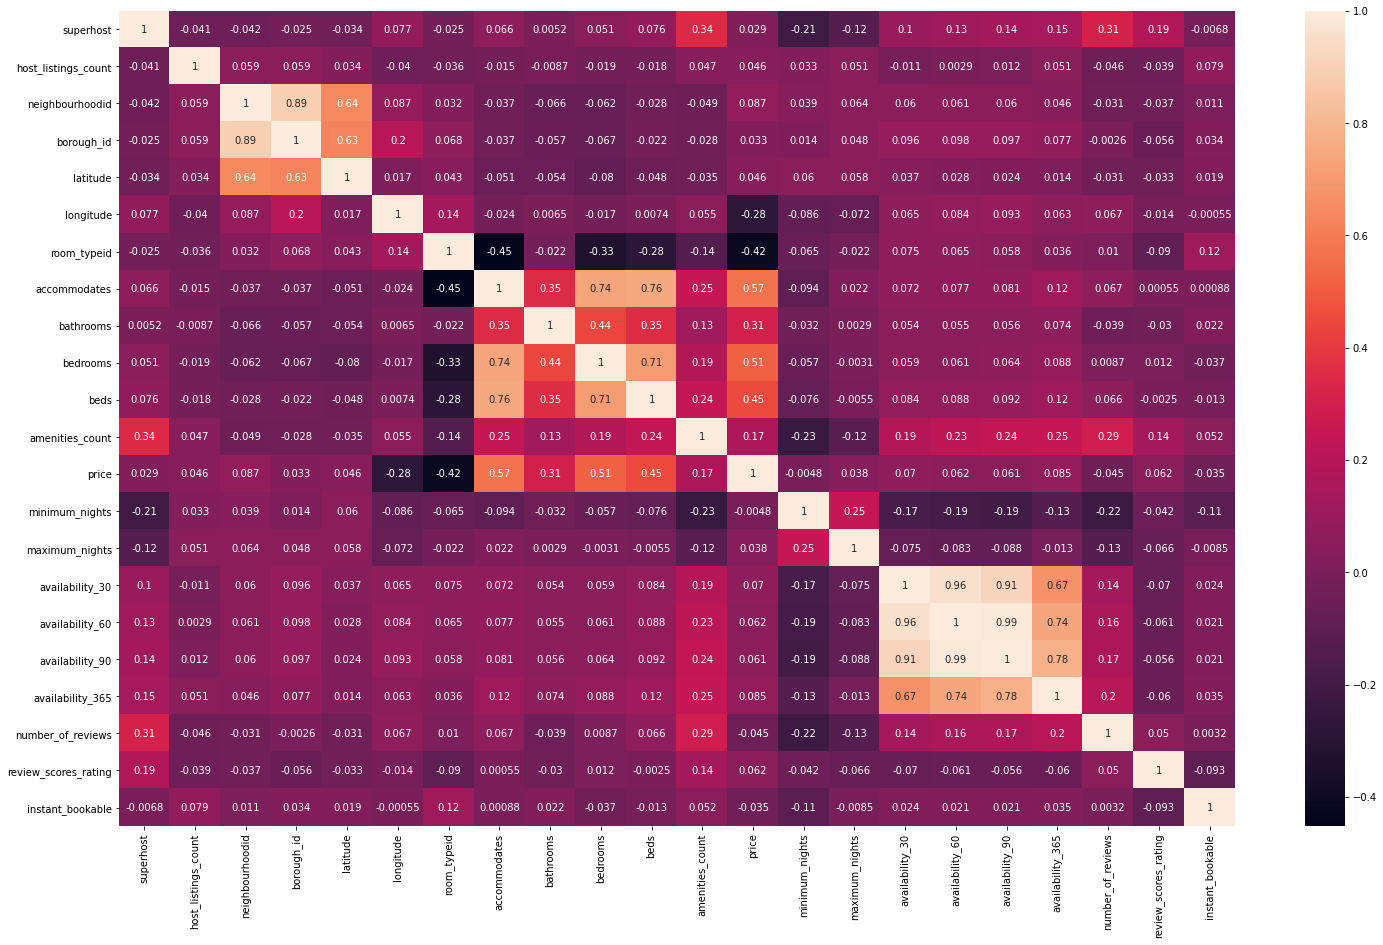

In [103]:
import seaborn as sns

plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix, annot= True)

In [104]:
plt.savefig('price_correlation.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
useless = ['availability_30', 'availability_60', 'availability_90']
listings_processed = listings_cleaned.drop(useless, axis=1)

In [ ]:
listings_processed = pd.get_dummies(listings_processed)
listings_processed.shape

(32881, 19)

In [ ]:
from sklearn.utils import shuffle
listings_processed = shuffle(listings_processed)

# Extract features and labels
y = listings_processed['price']
X = listings_processed.drop('price', axis = 1)

# Training and Testing Sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

train_X.shape, test_X.shape

((24660, 18), (8221, 18))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline (imputer + scaler + regressor)
my_pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(random_state=42))

# Fit the model
my_pipeline_RF.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n

In [ ]:
print(my_pipeline_RF.score(train_X, train_y))
print(my_pipeline_RF.score(test_X, test_y))

0.8888870585220388
0.16538311700761177


In [ ]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE)) 

In [ ]:
evaluate_model(my_pipeline_RF, test_X, test_y)

Median Absolute Error: 26.7
RMSE: 244.52


In [ ]:
evaluate_model(my_pipeline_RF, train_X, train_y)

Median Absolute Error: 9.84
RMSE: 91.58


In [ ]:
importances = my_pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False).head(22)

,feature,importance
4,latitude,0.163137
5,longitude,0.140097
11,amenities_count,0.104399
7,accommodates,0.076661
12,minimum_nights,0.066706
8,bathrooms,0.059767
14,availability_365,0.055449
16,review_scores_rating,0.049134
10,beds,0.046213
13,maximum_nights,0.043142


In [ ]:
feature_importances.to_csv("feature_importances")

In [ ]:
feature_importances.importance.sum()

1.0

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently used:\n')
pprint(my_pipeline_RF.get_params())

Parameters currently used:

{'memory': None,
 'randomforestregressor': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_impurity_split': None,
 'randomforest

In [ ]:
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 11)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = my_pipeline_RF, 
                               param_distributions = random_grid, 
                               n_iter = 50, cv = 2, verbose=2,
                               random_state = 42, n_jobs = -1, 
                               scoring = 'neg_median_absolute_error')
# Fit our model
rf_random.fit(train_X, train_y)

rf_random.best_params_

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 61.1min finished


{'randomforestregressor__bootstrap': False,
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 5,
 'randomforestregressor__n_estimators': 10}

In [ ]:
my_pipeline_RF_grid = make_pipeline(SimpleImputer(), StandardScaler(),
                                      RandomForestRegressor(random_state=42,
                                                            bootstrap = False,
                                                            max_features = 'sqrt',
                                                            min_samples_leaf = 1,
                                                            min_samples_split = 5,
                                                            n_estimators = 1050))

# Fit the model
my_pipeline_RF_grid.fit(train_X, train_y)

evaluate_model(my_pipeline_RF_grid, test_X, test_y)

Median Absolute Error: 26.8
RMSE: 238.8


In [93]:
print(my_pipeline_RF_grid.score(train_X, train_y))
print(my_pipeline_RF_grid.score(test_X, test_y))

0.9064245546678713
0.203990668634089


In [94]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [30, 35, 40], 
    'randomforestregressor__max_features': ['auto'],
    'randomforestregressor__min_samples_leaf': [2],
    'randomforestregressor__min_samples_split': [4, 5, 6],
    'randomforestregressor__n_estimators': [950, 1000, 1050] 
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = my_pipeline_RF, 
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, 
                           scoring = 'neg_median_absolute_error')

# Fit the grid search to the data
grid_search.fit(train_X, train_y)

grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 57.1min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 122.9min finished


{'randomforestregressor__bootstrap': True,
 'randomforestregressor__max_depth': 40,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 5,
 'randomforestregressor__n_estimators': 1050}

In [99]:
# Create the pipeline (imputer + scaler + regressor)
my_pipeline_RF_grid = make_pipeline(SimpleImputer(), StandardScaler(),
                                      RandomForestRegressor(random_state=42,
                                                            bootstrap = True,
                                                            max_depth = 30,
                                                            max_features = 'auto',
                                                            min_samples_leaf = 2,
                                                            min_samples_split = 5,
                                                            n_estimators = 1050))

# Fit the model
my_pipeline_RF_grid.fit(train_X, train_y)

evaluate_model(my_pipeline_RF_grid, test_X, test_y)

Median Absolute Error: 26.82
RMSE: 242.72


In [101]:
print(my_pipeline_RF_grid.score(train_X, train_y))
print(my_pipeline_RF_grid.score(test_X, test_y))

0.6544924031473974
0.1776391180157394
